In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [3]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
data = pd.read_csv(url, names=col_names, header=0)

In [4]:
print("Dataset Shape:", data.shape)
print(data.head())

Dataset Shape: (768, 9)
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [5]:
print("\nMissing values:\n", data.isnull().sum())
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = data[feature_cols]
y = data['label']



Missing values:
 pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print("\nShapes:")
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


Shapes:
(537, 7) (537,) (231, 7) (231,)


In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
model_rbf = SVC(kernel='rbf', random_state=0)
model_rbf.fit(X_train, y_train)

svc_pred_rbf = model_rbf.predict(X_test)
print("\nSVC Prediction (RBF):", svc_pred_rbf)



SVC Prediction (RBF): [0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1
 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 1 0 0 0 1]


In [9]:
conf_mat_rbf = metrics.confusion_matrix(y_test, svc_pred_rbf)
print("\nSVC [kernel = rbf]")
print("Confusion Matrix:\n", conf_mat_rbf)
print("Accuracy Score:", metrics.accuracy_score(y_test, svc_pred_rbf))
print("Accuracy in Percentage:", int(metrics.accuracy_score(y_test, svc_pred_rbf)*100), "%")
print("\nClassification Report:\n", classification_report(y_test, svc_pred_rbf))




SVC [kernel = rbf]
Confusion Matrix:
 [[135  25]
 [ 22  49]]
Accuracy Score: 0.7965367965367965
Accuracy in Percentage: 79 %

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       160
           1       0.66      0.69      0.68        71

    accuracy                           0.80       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.80      0.80      0.80       231



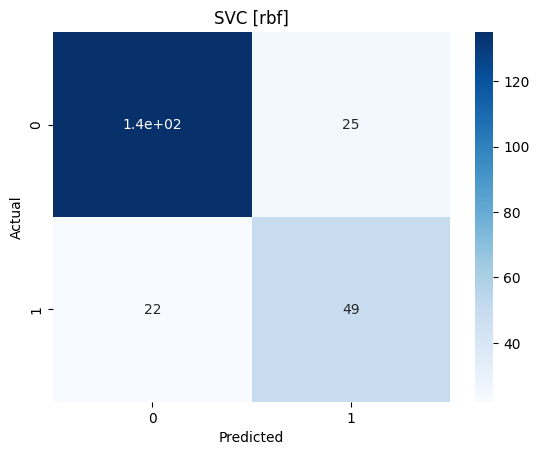

In [10]:
conf_mat_df = pd.crosstab(y_test, svc_pred_rbf, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, cmap="Blues").set(title='SVC [rbf]')
plt.show()

In [11]:
model_linear = SVC(kernel='linear', random_state=0)
model_linear.fit(X_train, y_train)

svc_pred_linear = model_linear.predict(X_test)
print("\nSVC Prediction (Linear):", svc_pred_linear)



SVC Prediction (Linear): [0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1
 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 1]


In [12]:
conf_mat_linear = metrics.confusion_matrix(y_test, svc_pred_linear)
print("\nSVC [kernel = linear]")
print("Confusion Matrix:\n", conf_mat_linear)
print("Accuracy Score:", metrics.accuracy_score(y_test, svc_pred_linear))
print("Accuracy in Percentage:", int(metrics.accuracy_score(y_test, svc_pred_linear)*100), "%")
print("\nClassification Report:\n", classification_report(y_test, svc_pred_linear))



SVC [kernel = linear]
Confusion Matrix:
 [[136  24]
 [ 23  48]]
Accuracy Score: 0.7965367965367965
Accuracy in Percentage: 79 %

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       160
           1       0.67      0.68      0.67        71

    accuracy                           0.80       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.80      0.80      0.80       231



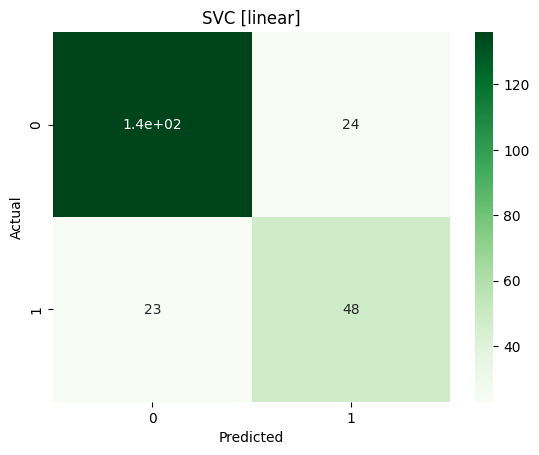

In [13]:
conf_mat_df = pd.crosstab(y_test, svc_pred_linear, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, cmap="Greens").set(title='SVC [linear]')
plt.show()
